In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import import_ipynb
from sklearn.datasets import make_classification
from DecisionTree import decision_tree
%matplotlib inline

importing Jupyter notebook from DecisionTree.ipynb
0.966


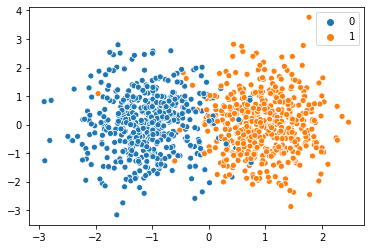

In [2]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1));

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

In [3]:
# using SAMME algorithm 
class adaboost:
    def __init__(self,n_estimators=100,random_sampling=False):
        self.n_estimators=n_estimators
        self.random_sampling=random_sampling
        self.TOTAL_ERROR_ERROR_TERM=0.00001
    
    def __get_total_sample_weights(self,predictions,y,sample_weights):
        total_sample_weights=0.0
        for (prediction,actual,sample_weight) in zip(predictions,y,sample_weights):
            if(prediction==actual):
                total_sample_weights+=sample_weight
        return total_sample_weights

    def __get_say(self,min_weight):
        return np.log((1-min_weight))/2

    def fit(self,x,y,print_every_nth_estimator = 100):
        assert x.shape[0]==y.shape[0] , "Unequal sample size"
        n=x.shape[0]
        features=x.shape[1]
        sample_weights=np.full(n,1/n)
        self.estimators=[]
        self.estimator_say=[]
        for estimator_count in range(self.n_estimators):
            min_estimator=None
            min_weight=np.float('-inf')
            for feature in range(features):
                estimator=decision_tree()
                data=np.array([x[:,feature]]).T
                estimator.fit(data,y,n_random_samples = 10,max_depth =2 )
                predictions=estimator.predict(data)
                total_sample_weights=self.__get_total_sample_weights(predictions,y,sample_weights)
                if(total_sample_weights>min_weight):
                    min_estimator=estimator
                    min_weight=total_sample_weights

            self.estimators.append(min_estimator)
            min_weight+=self.TOTAL_ERROR_ERROR_TERM
            say=self.__get_say(min_weight)
            self.estimator_say.append(say)
            predictions=min_estimator.predict(x)
            sample_weights=np.where(y!=predictions,sample_weights*np.exp(np.abs(say)),sample_weights*np.exp(-np.abs(say)))
            sample_weights=sample_weights/np.sum(sample_weights)

            if(self.random_sampling):
                cumsum = np.cumsum(sample_weights)
                random_nums = np.random.rand(len(sample_weights))
                positions = [np.min(np.where(cumsum>=value )) for value in random_nums]
                x = x[positions]
            if((estimator_count+1)%print_every_nth_estimator ==0):
                print("Completed training estimator {}".format(estimator_count+1))

    def predict(self,x):
        estimators_results=np.array([estimator.predict(x) for estimator in self.estimators]).T
        result=[]
        for predictions in estimators_results:
            zeros=0.0
            ones=0.0
            for i in range(self.n_estimators):
                if(predictions[i]==0):
                    zeros+=self.estimator_say[i]
                else:
                    ones+=self.estimator_say[i]
            if(zeros>ones):
                result.append(0)
            else:
                result.append(1)
        return np.array(result)
    


In [5]:
model = adaboost(n_estimators=100,random_sampling=True)
model.fit(x,y,print_every_nth_estimator = 10)

Completed training estimator 10


IndexError: index out of bounds

In [5]:
prediction=model.predict(x_test)

In [6]:
print("accuracy = {}".format((len(y_test)-sum(abs(prediction-y_test)))/len(y_test)))

accuracy = 0.452


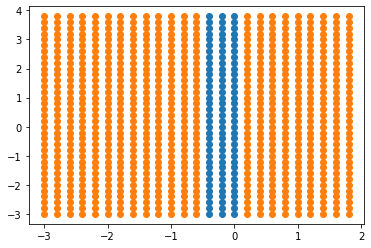

In [7]:
one1=[]
zero1=[]
one2=[]
zero2=[]
for i in np.arange(-3,2,0.2):
    for j in np.arange(-3,4,0.2):
        l=model.predict(np.array([[i,j]]))[0]
        if(l==1):
            one1.append(i)
            one2.append(j)
        else:
            zero1.append(i)
            zero2.append(j)
plt.scatter(np.array(one1),np.array(one2))
plt.scatter(np.array(zero1),np.array(zero2))